In [1]:
import pandas as pd
import void_library as VL
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline
import torch
import os
import pickle
import Pk_library as PKL
from matplotlib.ticker import LogLocator, AutoLocator



/share/apps/h5py/2.7.0rc2/intel/lib/python2.7/site-packages/h5py-2.7.0rc2-py2.7-linux-x86_64.egg/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## delta.shape

In [2]:
#import data
import pickle

with open('x_hod_0404_bs.pickle', 'rb') as handle:
    x_hod_bs = pickle.load(handle)
    
with open('y_hod_0404_bs.pickle', 'rb') as handle:
    y_hod_bs = pickle.load(handle)
    
with open('x_real_val_bs.pickle', 'rb') as handle:
    x_real_bs = pickle.load(handle)
    
with open('y_real_val_bs.pickle', 'rb') as handle:
    y_real_bs = pickle.load(handle)
    
with open('x_gen_0402_bs.pickle', 'rb') as handle:
    x_gen_bs = pickle.load(handle)
    
with open('y_gen_0402_bs.pickle', 'rb') as handle:
    y_gen_bs = pickle.load(handle)
    
    
    
    
with open('x_hod_0404_ps.pickle', 'rb') as handle:
    x_hod_ps = pickle.load(handle)
    
with open('y_hod_0404_ps.pickle', 'rb') as handle:
    y_hod_ps = pickle.load(handle)
    
with open('x_real_val_ps.pickle', 'rb') as handle:
    x_real_ps = pickle.load(handle)
    
with open('y_real_val_ps.pickle', 'rb') as handle:
    y_real_ps = pickle.load(handle)
    
with open('x_gen_0402_ps.pickle', 'rb') as handle:
    x_gen_ps = pickle.load(handle)
    
with open('y_gen_0402_ps.pickle', 'rb') as handle:
    y_gen_ps = pickle.load(handle)
    
    
    
with open('x_hod_0404_v.pickle', 'rb') as handle:
    x_hod_v = pickle.load(handle)
    
with open('y_hod_0404_v.pickle', 'rb') as handle:
    y_hod_v = pickle.load(handle)
    
with open('x_real_val_v.pickle', 'rb') as handle:
    x_real_v = pickle.load(handle)
    
with open('y_real_val_v.pickle', 'rb') as handle:
    y_real_v = pickle.load(handle)
    
    
with open('x_gen_0404_v.pickle', 'rb') as handle:
    x_gen_v = pickle.load(handle)
    
with open('y_gen_0404_v.pickle', 'rb') as handle:
    y_gen_v = pickle.load(handle)    
    
    

In [7]:
import matplotlib.ticker as ticker
#plots from saved files

def plot_power_spec2(sample_dir, dim ='3d', plot_type='ps' , 
                   threads=1, MAS="CIC",  BoxSize=75.0/2048*64, axis = 0,
                   theta = np.linspace(0, np.pi, 50) , k1 = 6 , k2 =6.5,
                   #from 0 to pi
                   threshold = -0.7, Rmax=2, Rmin=0.1, bins=25, Omega_m=0.3175 ,void_field=True,
                   x_hod_bs=x_hod_bs, y_hod_bs=y_hod_bs, x_real_bs=x_real_bs, y_real_bs=y_real_bs, x_gen_bs=x_gen_bs, y_gen_bs=y_gen_bs,
                   x_hod_ps=x_hod_ps, y_hod_ps=y_hod_ps, x_real_ps=x_real_ps, y_real_ps=y_real_ps, x_gen_ps=x_gen_ps, y_gen_ps=y_gen_ps,
                   x_hod_v=x_hod_v, y_hod_v=y_hod_v, x_real_v=x_real_v, y_real_v=y_real_v, x_gen_v=x_gen_v, y_gen_v=y_gen_v
                   ):
    """Takes as input;
    - Real cube: ,
    - Generated copy:,
    - constant assignments: .
    
    Returns;
    - Power spectrum plots of both cubes
    in the same figure.
    """
    f=plt.figure(figsize=(10,5))



    if plot_type == 'ps':
        hod_y = (y_hod_ps)
        hod_x = (x_hod_ps)
        real_y = (y_real_ps)
        real_x = (x_real_ps)
        gen_y = (y_gen_ps)
        gen_x = (x_gen_ps)
        #title = 'Power Spectrum Comparison'
        xlabel = r'$k\ [h/ \rm{Mpc}]$'
        ylabel = r'$P(k)\ [(\rm{Mpc}/h)^3]$'
                
    elif plot_type == 'bs':
        hod_y = y_hod_bs
        hod_x = x_hod_bs
        real_y = y_real_bs
        real_x = x_real_bs
        gen_y = y_gen_bs
        gen_x = x_gen_bs
        #title = 'Bispectrum Comparison, k1='+ str(k1)+' k2='+str(k2)
        xlabel = r'$\theta\ [\rm{radians}]$'
        ylabel = r'$B(k)$'

    else:
        hod_y = (y_hod_v)
        hod_x = (x_hod_v)
        real_y = (y_real_v)
        real_x = (x_real_v)
        gen_y = (y_gen_v)
        gen_x = (x_gen_v)
        #title = 'Voids Comparison'
        xlabel = r'$R\ [\rm{Mpc}/h]$'
        ylabel = r'$VSF\ [h^4/\rm{Mpc}^4]$'
         


    gen_y_ = gen_y#np.ma.masked_invalid(gen_y)
    real_y_ = real_y#np.ma.masked_invalid(real_y)
    hod_y_ = hod_y#np.ma.masked_invalid(hod_y)
    
    if (plot_type == 'ps'):
        o1=0.1
        o2=0.2
    elif (plot_type == 'v'):
        o1=0.002
        o2=0.004
    else:
        o1=0.015
        o2=0.03
    
       
    plt.rcParams["font.size"] = 16
    #plt.title(title)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    
    
    if (plot_type == 'ps'):
        
        plt.errorbar(np.nanmean(real_x, axis=0),np.nanmean(real_y_, axis=0), np.std(real_y_, axis=0), label="IllustrisTNG",color="b",alpha=0.4)
        plt.errorbar(np.nanmean(gen_x, axis=0)+o1,np.nanmean(gen_y_, axis=0), np.std(gen_y_, axis=0), label="WGAN",color="r",alpha=0.4)
        plt.errorbar(np.nanmean(hod_x, axis=0)+o2,np.nanmean(hod_y_, axis=0), np.std(hod_y_, axis=0), label="HOD",color="k",alpha=0.4)
    
        plt.scatter(np.nanmean(real_x, axis=0),np.nanmean(real_y_, axis=0),color="b")
        plt.scatter(np.nanmean(gen_x, axis=0)+o1,np.nanmean(gen_y_, axis=0),color="r" )
        plt.scatter(np.nanmean(hod_x, axis=0)+o2,np.nanmean(hod_y_, axis=0),color="k")
        
        plt.yscale('symlog')
        plt.xscale('symlog') #, linthreshy=0.1
        #plt.ylim(-1.6, 2.3)
        plt.xlim(3,160)
        plt.ylim(1e-1,2e1)
        #plt.ylim(0.0000000001,20)
        ax = plt.axes()
        #ax.tick_params(axis='x', which='minor', bottom=False)
        #ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
        ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
        plt.legend(loc='best',
          fancybox=True, shadow=True, ncol=3, prop={'size': 16})
    


    elif (plot_type == 'v'):
        
        #ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
        plt.errorbar(np.nanmean(real_x, axis=0)[3:18],np.nanmean(real_y_, axis=0)[3:18], np.nanstd(real_y_, axis=0)[3:18], label="IllustrisTNG",color="b")
        plt.errorbar(np.nanmean(gen_x, axis=0)[3:18]+o1,np.nanmean(gen_y_, axis=0)[3:18], np.nanstd(gen_y_, axis=0)[3:18], label="WGAN",color="r")
        plt.errorbar(np.nanmean(hod_x, axis=0)[3:18]+o2,np.nanmean(hod_y_, axis=0)[3:18], np.nanstd(hod_y_, axis=0)[3:18], label="HOD",color="k")
    
        plt.scatter(np.nanmean(real_x, axis=0)[3:18],np.nanmean(real_y_, axis=0)[3:18],color="b")
        plt.scatter(np.nanmean(gen_x, axis=0)[3:18]+o1,np.nanmean(gen_y_, axis=0)[3:18],color="r" )
        plt.scatter(np.nanmean(hod_x, axis=0)[3:18]+o2,np.nanmean(hod_y_, axis=0)[3:18],color="k")
        
        plt.yscale('symlog')
        #plt.xscale('symlog')
        plt.xlim(0,0.5)
        #plt.ylim(-0.5,10000)
        plt.ylim(0,10000)
        plt.legend(loc='best',
          fancybox=True, shadow=True, ncol=1, prop={'size': 16})
    

    else: 
        
        plt.errorbar(np.nanmean(real_x, axis=0)[::5],np.nanmean(real_y_, axis=0)[::5], np.std(real_y_, axis=0)[::5], label="IllustrisTNG",color="b",alpha=0.4)
        plt.errorbar(np.nanmean(gen_x, axis=0)[::5]+o1,np.nanmean(gen_y_, axis=0)[::5], np.std(gen_y_, axis=0)[::5], label="WGAN",color="r",alpha=0.4)
        plt.errorbar(np.nanmean(hod_x, axis=0)[::5]+o2,np.nanmean(hod_y_, axis=0)[::5], np.std(hod_y_, axis=0)[::5], label="HOD",color="k",alpha=0.4)
    
        plt.scatter(np.nanmean(real_x, axis=0)[::5],np.nanmean(real_y_, axis=0)[::5],color="b")
        plt.scatter(np.nanmean(gen_x, axis=0)[::5]+o1,np.nanmean(gen_y_, axis=0)[::5],color="r" )
        plt.scatter(np.nanmean(hod_x, axis=0)[::5]+o2,np.nanmean(hod_y_, axis=0)[::5],color="k")
     
        plt.xlim(-0.1,3)
        plt.ylim(-15,30)
        plt.legend(loc='upper left',
          fancybox=True, shadow=True, ncol=3, prop={'size': 16})
    
        
    
    plt.show()
    

    
    return f

# to do
#I would also try to add more numbers in the x-axis of the first and 
#third graphs

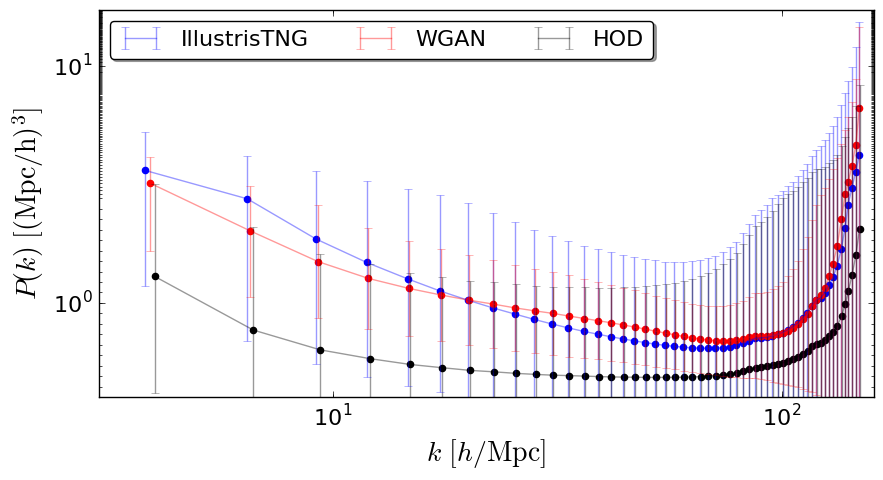

In [8]:
f = plot_power_spec2('/beegfs/ao1512/mmd-gan/','3d','ps',x_hod_bs=x_hod_bs, y_hod_bs=y_hod_bs, x_real_bs=x_real_bs, y_real_bs=y_real_bs, x_gen_bs=x_gen_bs, y_gen_bs=y_gen_bs,
                   x_hod_ps=x_hod_ps, y_hod_ps=y_hod_ps, x_real_ps=x_real_ps, y_real_ps=y_real_ps, x_gen_ps=x_gen_ps, y_gen_ps=y_gen_ps,
                   x_hod_v=x_hod_v, y_hod_v=y_hod_v, x_real_v=x_real_v, y_real_v=y_real_v, x_gen_v=x_gen_v, y_gen_v=y_gen_v
                   )
f.savefig('ps.png',  dpi=300)


In [4]:
2e1

20.0